# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
df = pd.read_csv('Mall_Customers.csv')



**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Distribuição de Gênero:
Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


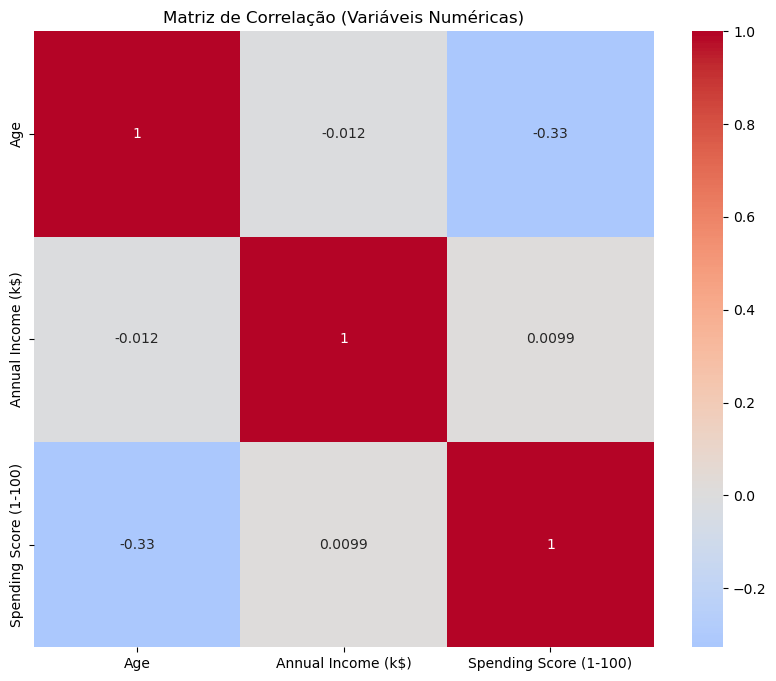

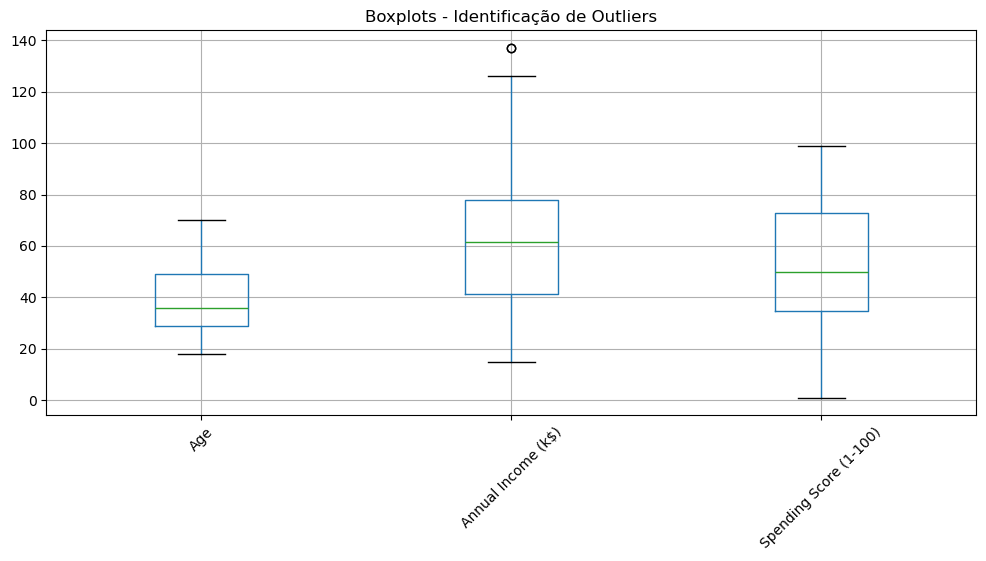

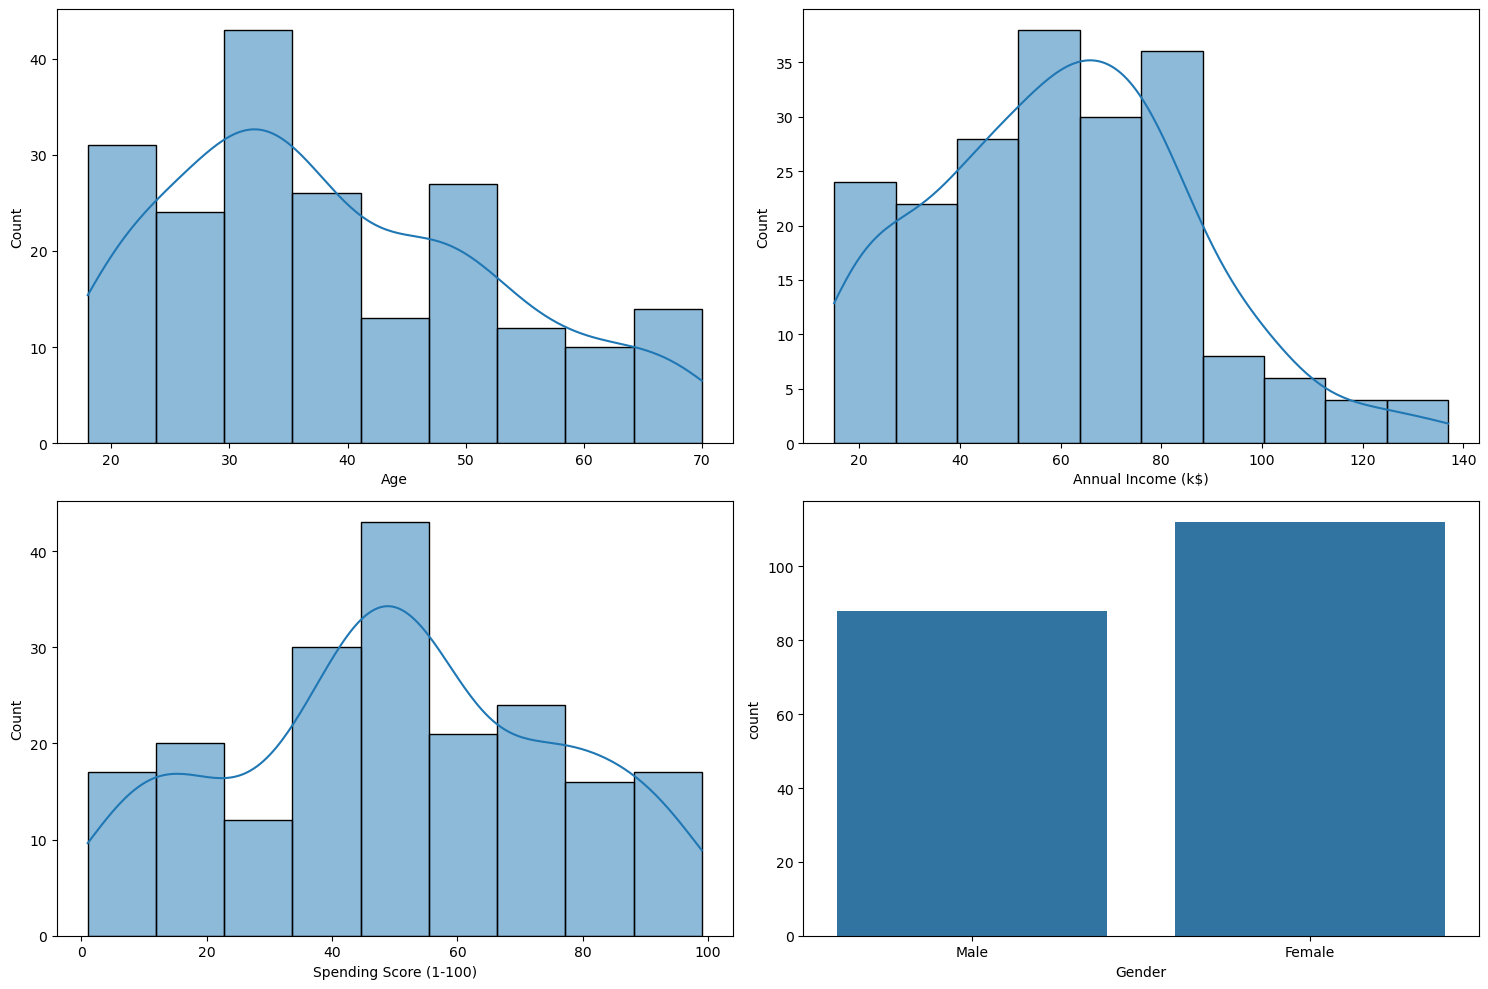

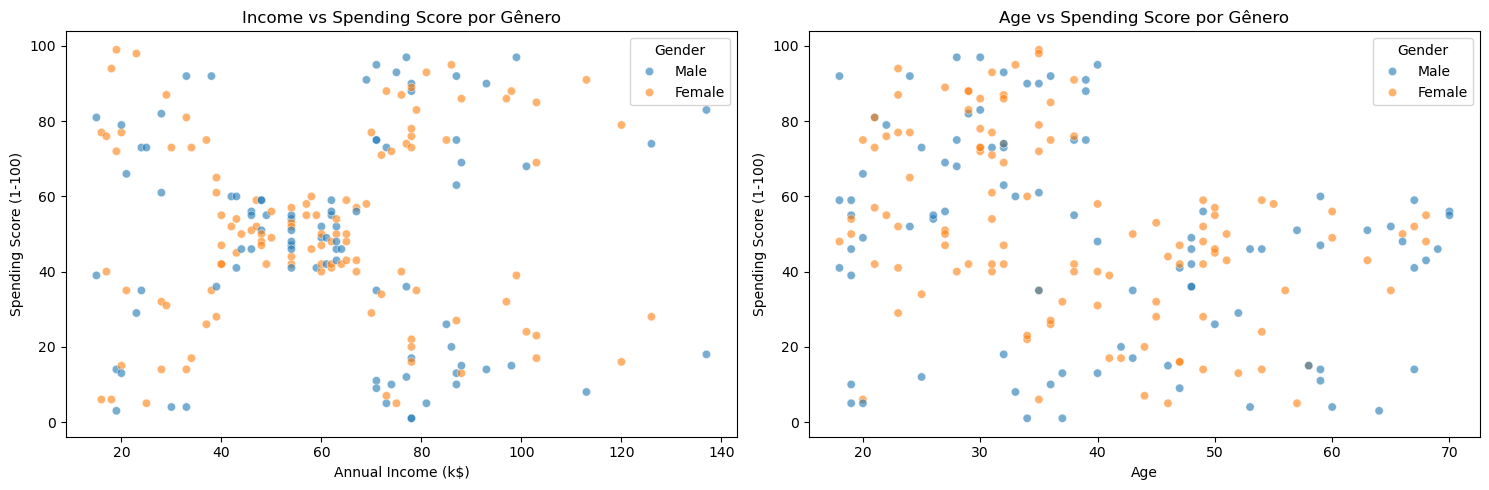

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploração de Dados
df.info()
df.describe()

# 1. Distribuição de gênero
print("Distribuição de Gênero:")
print(df['Gender'].value_counts(normalize=True))

# 2. Correlações (apenas numéricas)
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.show()

# 3. Boxplots
plt.figure(figsize=(12, 5))
df[numeric_cols].boxplot()
plt.title('Boxplots - Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()

# 4. Distribuições
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, ax=axes[1,0])
sns.countplot(data=df, x='Gender', ax=axes[1,1])
plt.tight_layout()
plt.show()

# 5. Relações bivariadas por gênero
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Gender', alpha=0.6)
plt.title('Income vs Spending Score por Gênero')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', 
                hue='Gender', alpha=0.6)
plt.title('Age vs Spending Score por Gênero')

plt.tight_layout()
plt.show()

Aqui está uma análise para a área de negócios baseada nos gráficos:

### 1. Perfil Demográfico
- **Gênero**: Ligeira maioria de clientes femininas
- **Idade**:
  - Concentração entre 25-35 anos
  - Pico próximo aos 30-35 anos
  - Poucos clientes acima de 60 anos
  - Oportunidade: desenvolver estratégias para atrair/reter clientes 45+

### 2. Renda Anual (Annual Income)
- Distribuição:
  - Média ~60k
  - Maioria entre 40k-80k
  - Pequeno grupo de alta renda (>100k)
- Oportunidade: 
  - Segmentar produtos/serviços por faixa de renda
  - Desenvolver ofertas premium para o grupo >100k

### 3. Padrão de Gastos (Spending Score)
- Distribuição trimodal:
  - Grupo econômico (score baixo)
  - Grupo moderado (score médio)
  - Grupo alto consumo (score alto)
- Insights:
  - Potencial para estratégias diferenciadas por grupo
  - Programas de fidelidade específicos

### 4. Correlações Importantes
- **Age vs Spending Score** (-0.33):
  - Correlação negativa: jovens tendem a gastar mais
  - Oportunidade: marketing direcionado por faixa etária
  
- **Income vs Spending**: 
  - Correlação quase nula (0.009)
  - Insight importante: renda não determina padrão de gastos
  - Necessidade de segmentação além da renda

### 5. Padrões por Gênero
- **Spending vs Income**:
  - Clusters visíveis independente do gênero
  - Grupos de alto gasto em diferentes níveis de renda
  - Oportunidade: personalização por comportamento, não só gênero

### 6. Outliers e Grupos Especiais
- Alguns clientes com renda muito alta (>120k)
- Grupos distintos de comportamento de gasto
- Oportunidade: 
  - Desenvolver programas VIP
  - Investigar casos de sucesso em cada segmento

### Recomendações para Negócio
1. **Segmentação**: Criar 3-4 perfis de clientes para marketing direcionado
2. **Jovens**: Foco em estratégias digitais e tendências
3. **Alta Renda**: Desenvolver linha premium de produtos/serviços
4. **Fidelização**: Programas específicos por padrão de gasto
5. **Personalização**: Marketing baseado em comportamento, não apenas demografia

Esta análise sugere uma abordagem de marketing e vendas mais personalizada, baseada em comportamento real de consumo em vez de apenas características demográficas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

1. **Análise Inicial dos Dados**
- Temos um dataset com 200 registros e 5 colunas
- Não há valores nulos (todas as colunas têm 200 registros não-nulos)
- Temos variáveis numéricas (Age, Annual Income, Spending Score) e categóricas (Gender)
- CustomerID é uma variável de identificação que não será usada para clustering

2. **Necessidade de Tratamento e Limpeza**

a) **Valores Ausentes**: 
- Não há necessidade de tratamento pois não existem valores ausentes

b) **Outliers**:
- Observamos alguns outliers nos boxplots, principalmente em:
  - Annual Income (k$): alguns clientes com renda muito alta (>120k)
  - Age: alguns clientes mais velhos
- Não vamos remover os outliers pois podem representar segmentos importantes de clientes

c) **Variáveis Categóricas**:
- Gender precisa ser convertido para formato numérico
- Iremos usar one-hot encoding para Gender

3. **Necessidade de Normalização/Padronização**:
- Iremos fazer a padronização porque:
  - As variáveis têm escalas muito diferentes:
    - Age: varia aproximadamente de 18-70
    - Annual Income: varia de 15-137 (em milhares)
    - Spending Score: varia de 1-100
  - O K-means é sensível a escalas diferentes
- Iremos usar StandardScaler para padronizar as variáveis numéricas

4. **Potenciais Variáveis Derivadas**:
Baseado na análise exploratória, podemos considerar criar:
- Categorias de idade (jovem, adulto, sênior)
- Faixas de renda (baixa, média, alta)
- Níveis de gastos (econômico, moderado, alto)
- Ratio de gasto/renda para identificar comportamento de consumo relativo à renda


Algumas observações importantes sobre o tratamento proposto:

1. **Padronização**: Usamos StandardScaler porque:
   - Coloca todas as variáveis na mesma escala (média 0, desvio padrão 1)
   - Mantém a distribuição original dos dados
   - É menos sensível a outliers que o MinMaxScaler

2. **Variáveis Derivadas**: 
   - O ratio gasto/renda pode revelar padrões interessantes de comportamento
   - As categorias criadas facilitam a interpretação dos resultados
   - Mantivemos tanto as variáveis originais (padronizadas) quanto as derivadas

3. **One-hot Encoding**:
   - Transforma a variável Gender em duas colunas binárias
   - Evita problemas de ordenação artificial em variáveis categóricas

Verificando valores inconsistentes:

Valores negativos:
Age: 0 valores negativos
Annual Income (k$): 0 valores negativos
Spending Score (1-100): 0 valores negativos

Valores fora do domínio esperado:
Idades > 100: 0
Spending Score fora do range 1-100: 0

Resumo estatístico dos dados processados:
                Age  Annual Income (k$)  Spending Score (1-100)  \
count  2.000000e+02        2.000000e+02            2.000000e+02   
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16   
std    1.002509e+00        1.002509e+00            1.002509e+00   
min   -1.496335e+00       -1.738999e+00           -1.910021e+00   
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01   
50%   -2.045351e-01        3.587926e-02           -7.764312e-03   
75%    7.284319e-01        6.656748e-01            8.851316e-01   
max    2.235532e+00        2.917671e+00            1.894492e+00   

       Spending_Income_Ratio  Income_Per_Age  Spending_Per_Age  
count             200.000000      

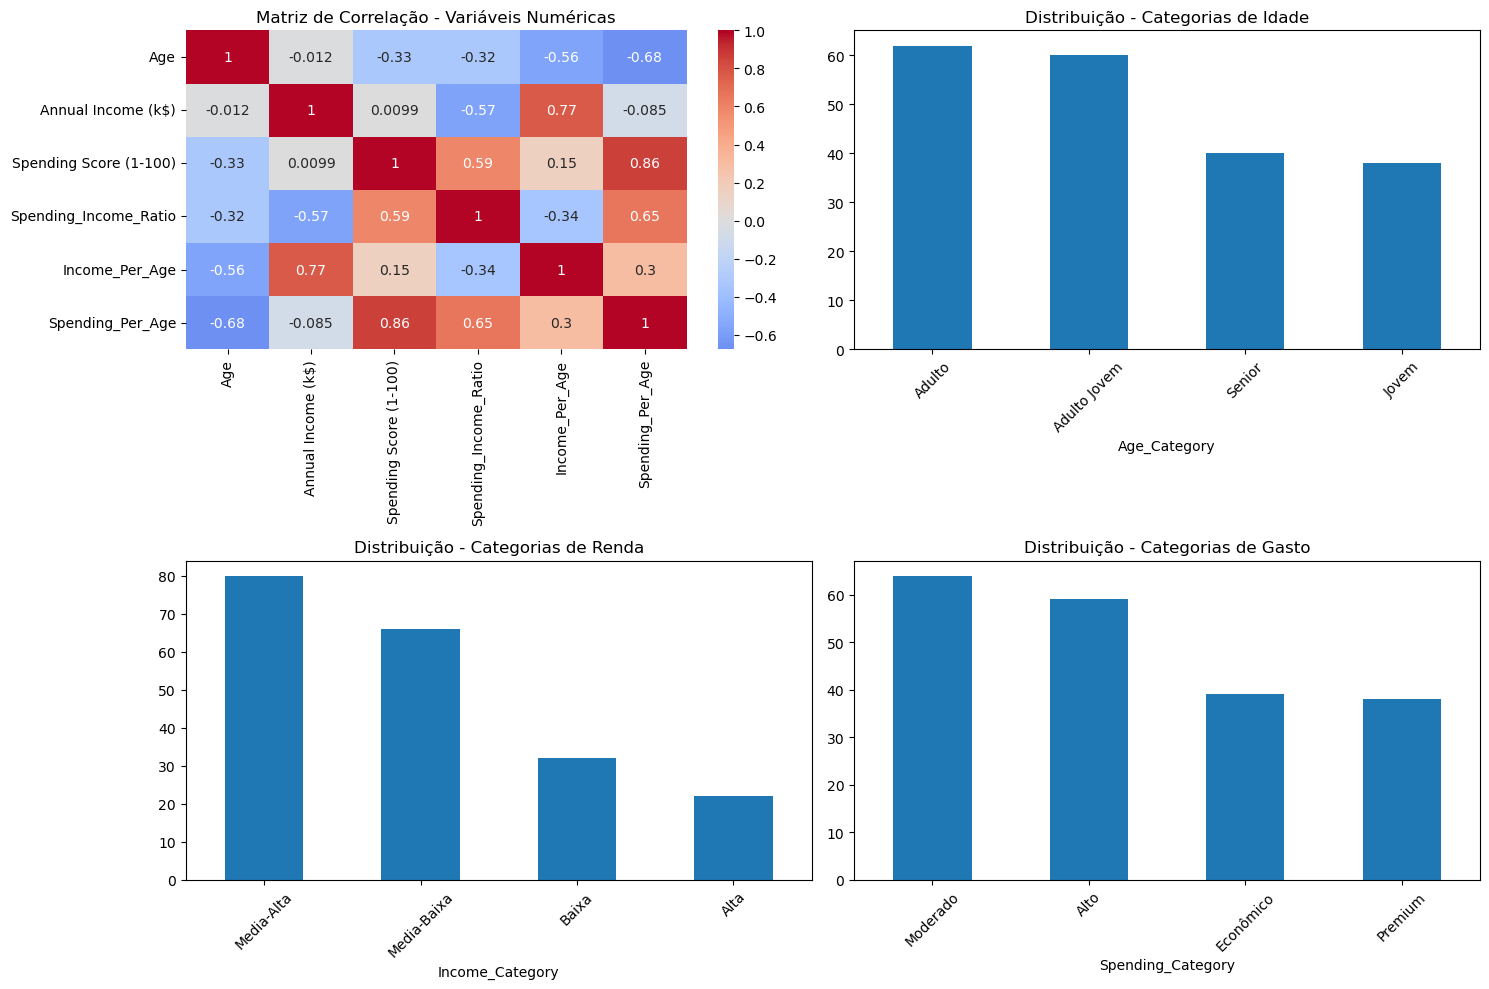


Verificando valores ausentes após processamento:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
Spending_Income_Ratio     0
Income_Per_Age            0
Spending_Per_Age          0
Age_Category              0
Income_Category           0
Spending_Category         0
dtype: int64

Variáveis disponíveis para clustering:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending_Income_Ratio', 'Income_Per_Age', 'Spending_Per_Age']


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Verificação inicial de valores inconsistentes
print("Verificando valores inconsistentes:")
print("\nValores negativos:")
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} valores negativos")

print("\nValores fora do domínio esperado:")
age_invalid = (df['Age'] > 100).sum()
score_invalid = ((df['Spending Score (1-100)'] < 1) | (df['Spending Score (1-100)'] > 100)).sum()
print(f"Idades > 100: {age_invalid}")
print(f"Spending Score fora do range 1-100: {score_invalid}")

# 2. Tratamento de variáveis categóricas com one-hot encoding
df_processed = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

# 3. Padronização das variáveis numéricas
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# 4. Criação de variáveis derivadas mais completa
# Usando dados originais para cálculos de ratios
df_processed['Spending_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
df_processed['Income_Per_Age'] = df['Annual Income (k$)'] / df['Age']
df_processed['Spending_Per_Age'] = df['Spending Score (1-100)'] / df['Age']

# Categorias com mais detalhamento
df_processed['Age_Category'] = pd.cut(df['Age'], 
                                    bins=[0, 25, 35, 50, 100],
                                    labels=['Jovem', 'Adulto Jovem', 'Adulto', 'Senior'])

df_processed['Income_Category'] = pd.cut(df['Annual Income (k$)'],
                                       bins=[0, 30, 60, 90, 150],
                                       labels=['Baixa', 'Media-Baixa', 'Media-Alta', 'Alta'])

df_processed['Spending_Category'] = pd.cut(df['Spending Score (1-100)'],
                                         bins=[0, 25, 50, 75, 100],
                                         labels=['Econômico', 'Moderado', 'Alto', 'Premium'])

# 5. Remover CustomerID
df_processed = df_processed.drop('CustomerID', axis=1)

# 6. Análise completa após processamento
print("\nResumo estatístico dos dados processados:")
print(df_processed.describe())

# Verificar correlações apenas para variáveis numéricas
numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_processed[numeric_columns].corr()

# Visualizações
plt.figure(figsize=(15, 10))

# Matriz de correlação
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')

# Distribuição das categorias
plt.subplot(2, 2, 2)
df_processed['Age_Category'].value_counts().plot(kind='bar')
plt.title('Distribuição - Categorias de Idade')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df_processed['Income_Category'].value_counts().plot(kind='bar')
plt.title('Distribuição - Categorias de Renda')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df_processed['Spending_Category'].value_counts().plot(kind='bar')
plt.title('Distribuição - Categorias de Gasto')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 7. Verificação de missing values após processamento
print("\nVerificando valores ausentes após processamento:")
print(df_processed.isnull().sum())

# 8. Salvando as variáveis categóricas separadamente para análise
categorical_vars = df_processed.select_dtypes(include=['category']).columns
df_categories = df_processed[categorical_vars].copy()

# 9. Dataset final para clustering (apenas variáveis numéricas padronizadas)
df_for_clustering = df_processed.select_dtypes(include=['float64', 'int64'])

print("\nVariáveis disponíveis para clustering:")
print(df_for_clustering.columns.tolist())

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

Calculando método do cotovelo...


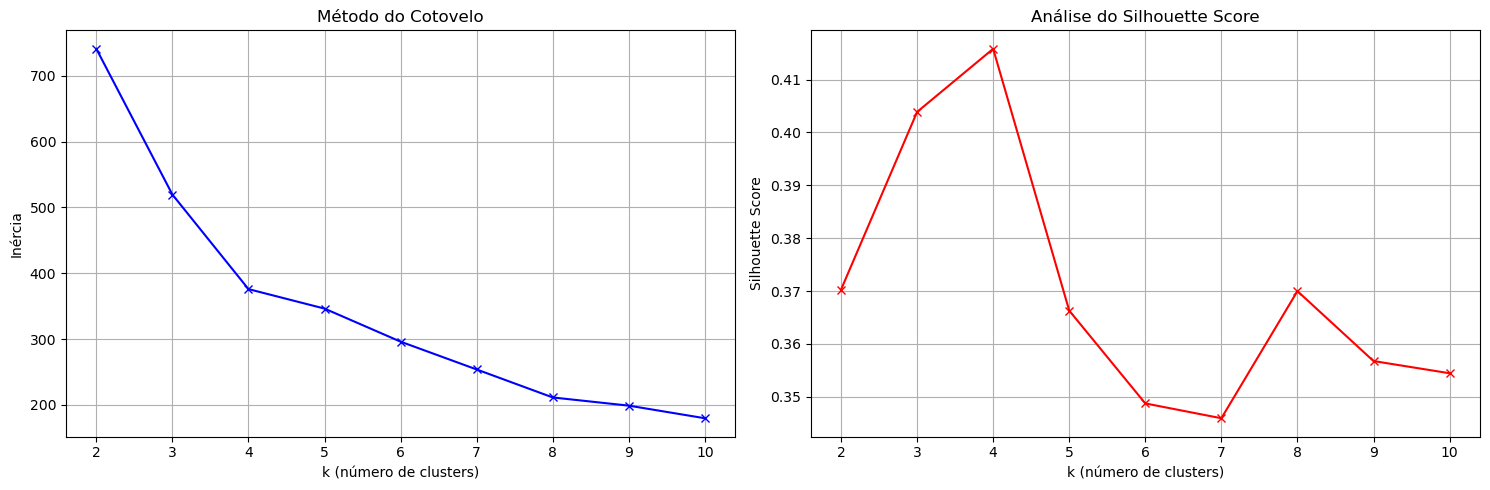


Resultados detalhados:

k	Inércia		Silhouette Score
----------------------------------------
2	740.88		0.3703
3	519.49		0.4039
4	375.87		0.4158
5	346.26		0.3663
6	296.03		0.3487
7	253.81		0.3459
8	211.29		0.3700
9	198.85		0.3568
10	179.70		0.3545

Visualizando clusters para diferentes valores de k:


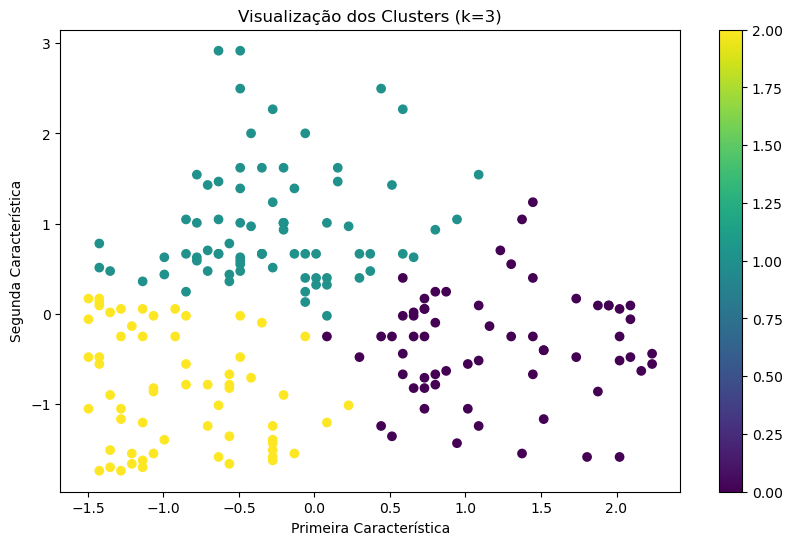

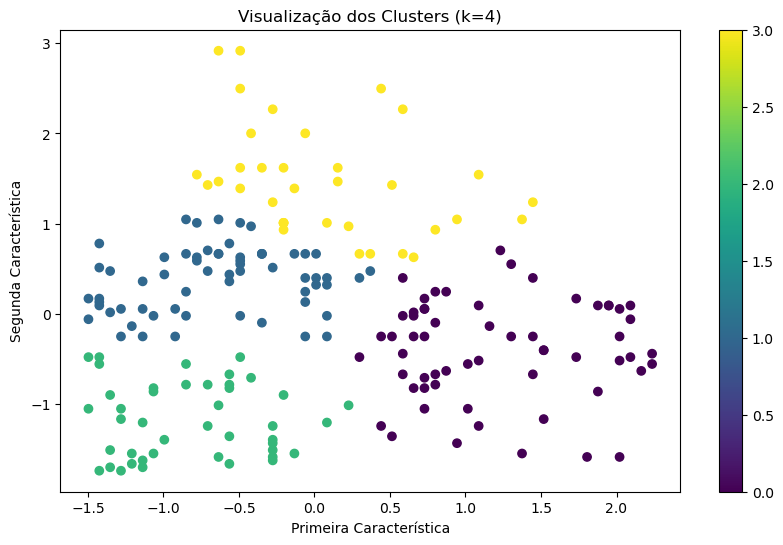

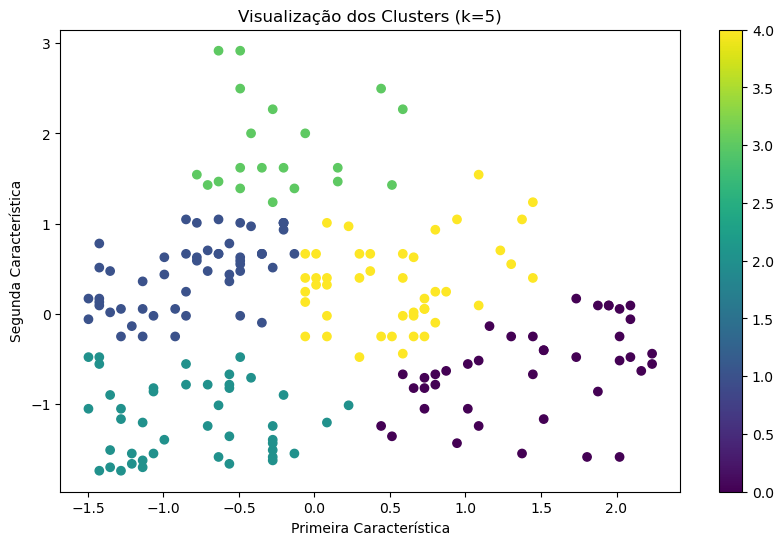


Análise estatística para k=3:

Média das características por cluster:
              Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                         
0        0.709800           -0.203781               -0.574037   
1       -0.698054            0.714825                0.482557   
2       -0.993969           -1.347348                1.064048   

         Spending_Income_Ratio  Income_Per_Age  Spending_Per_Age  
Cluster                                                           
0                     0.735987        1.186606          0.756789  
1                     0.828091        2.777065          2.168382  
2                     3.335453        1.052102          3.205402  

Tamanho dos clusters:
Cluster
0    104
1     73
2     23
Name: count, dtype: int64

Análise estatística para k=4:

Média das características por cluster:
              Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                         

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar os dados para clustering (usando apenas variáveis numéricas padronizadas)
X = df_for_clustering.values

# Lista de valores de k para testar
k_range = range(2, 11)

# 1. Método do Cotovelo
print("Calculando método do cotovelo...")
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualização dos resultados
plt.figure(figsize=(15, 5))

# Gráfico do Método do Cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k (número de clusters)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)

# Gráfico do Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k (número de clusters)')
plt.ylabel('Silhouette Score')
plt.title('Análise do Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir os scores para análise detalhada
print("\nResultados detalhados:")
print("\nk\tInércia\t\tSilhouette Score")
print("-" * 40)
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"{k}\t{inertia:.2f}\t\t{silhouette:.4f}")

# Visualização dos clusters para diferentes valores de k
def plot_clusters(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Primeira Característica')
    plt.ylabel('Segunda Característica')
    plt.title(f'Visualização dos Clusters (k={k})')
    plt.colorbar(scatter)
    plt.show()

# Visualizar clusters para k=3, k=4 e k=5
print("\nVisualizando clusters para diferentes valores de k:")
for k in [3, 4, 5]:
    plot_clusters(X[:, :2], k)  # Usando as duas primeiras características para visualização

# Análise das características dos clusters
def analyze_clusters(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Criar DataFrame com os dados e labels
    cluster_df = pd.DataFrame(X, columns=df_for_clustering.columns)
    cluster_df['Cluster'] = labels
    
    # Análise estatística por cluster
    print(f"\nAnálise estatística para k={k}:")
    print("\nMédia das características por cluster:")
    print(cluster_df.groupby('Cluster').mean())
    
    print("\nTamanho dos clusters:")
    print(cluster_df['Cluster'].value_counts().sort_index())
    
    return cluster_df

# Analisar clusters para k=3, k=4 e k=5
for k in [3, 4, 5]:
    cluster_df = analyze_clusters(X, k)

Para determinar o número ideal de clusters (k) para o K-means, vamos usar alguns métodos populares de avaliação:

1. Método do Cotovelo (Elbow Method)
2. Método da Silhueta (Silhouette Score)
3. Análise visual dos clusters

Este código vai nos ajudar a determinar o número ideal de clusters através de:

1. **Método do Cotovelo**:
   - Plota a inércia (soma das distâncias quadradas dentro do cluster) vs número de clusters
   - O "cotovelo" da curva indica um bom valor para k
   - Após este ponto, adicionar mais clusters traz menos benefício

2. **Silhouette Score**:
   - Mede o quão similar um objeto é ao seu próprio cluster em comparação com outros clusters
   - Varia de -1 a 1, onde valores mais altos são melhores
   - O k com maior score pode ser considerado ótimo

3. **Visualização dos Clusters**:
   - Mostra como os dados se agrupam para diferentes valores de k
   - Ajuda a verificar se os clusters fazem sentido visualmente

4. **Análise Estatística**:
   - Calcula estatísticas descritivas para cada cluster
   - Mostra o tamanho dos clusters
   - Ajuda a interpretar o significado de cada cluster

Após executar este código, poderemos:
1. Identificar o número ideal de clusters baseado nos métodos quantitativos
2. Validar visualmente se os clusters fazem sentido
3. Entender as características de cada cluster


**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

# Análise do Número Ideal de Clusters (K)

## 1. Método do Cotovelo
- O gráfico mostra uma curva de inércia que diminui à medida que K aumenta
- Observamos um "cotovelo" claro em K=4, onde:
  - A redução da inércia é significativa até K=4 (de 740.88 para 375.87)
  - Após K=4, a redução se torna mais gradual e menos significativa
  - Isso sugere que K=4 pode ser um bom ponto de equilíbrio

## 2. Silhouette Score
- O score de silhueta nos ajuda a avaliar a qualidade dos clusters:
  - K=4 apresenta o maior score (0.4158)
  - K=3 também mostra um bom score (0.4039)
  - Scores acima de 0.35 para todos os valores de K indicam uma separação razoável
  - A queda significativa após K=4 sugere que mais clusters podem não melhorar a qualidade da segmentação

## 3. Análise Visual dos Clusters
Analisando os três gráficos de visualização:

- **K=3**:
  - Mostra uma separação clara em três grupos
  - Os clusters parecem bem definidos e com pouca sobreposição
  - Distribuição relativamente equilibrada

- **K=4**:
  - Apresenta uma separação ainda mais refinada
  - Os clusters continuam bem definidos
  - Adiciona um nível útil de granularidade à segmentação

- **K=5**:
  - Começa a mostrar alguns clusters menores e potencialmente menos significativos
  - A separação entre alguns clusters se torna menos clara

## 4. Análise Estatística dos Clusters (K=3)

### Tamanho dos Clusters:
- Cluster 0: 104 clientes (52%)
- Cluster 1: 73 clientes (36.5%)
- Cluster 2: 23 clientes (11.5%)

### Características dos Clusters:

**Cluster 0 (Conservadores)**:
- Idade mais alta (0.71 desvios acima da média)
- Renda e gastos abaixo da média
- Menor razão gasto/renda (0.74)
- Representa o maior grupo

**Cluster 1 (Equilibrados)**:
- Idade abaixo da média (-0.70)
- Renda acima da média (0.71)
- Gastos moderadamente altos (0.48)
- Boa relação renda/idade (2.78)

**Cluster 2 (Alto Consumo)**:
- Idade muito abaixo da média (-0.99)
- Renda muito abaixo da média (-1.35)
- Gastos muito acima da média (1.06)
- Maior razão gasto/renda (3.34)
- Menor grupo mas mais distintivo

# Conclusão

Com base em todas as análises, é melhor usar **K=4** pelos seguintes motivos:

1. **Evidência Quantitativa**:
   - Melhor score de silhueta (0.4158)
   - Ponto de cotovelo claro no gráfico de inércia
   
2. **Evidência Visual**:
   - Clusters bem definidos e separados
   - Granularidade adequada para segmentação de clientes

3. **Aplicabilidade Prática**:
   - Oferece um número gerenciável de segmentos
   - Permite estratégias de marketing mais direcionadas
   - Balance entre simplicidade e detalhamento


# Estratégias de Segmentação e Marketing por Cluster

## Cluster 0 - "Conservadores Maduros" (52% dos clientes)
**Características:**
- Idade mais elevada
- Renda e gastos abaixo da média
- Comportamento de consumo conservador

**Estratégias Recomendadas:**
1. **Programa de Fidelidade:**
   - Benefícios de longo prazo
   - Pontos que não expiram
   - Descontos progressivos por tempo de relacionamento

2. **Comunicação e Marketing:**
   - Ênfase em segurança e confiabilidade
   - Comunicação tradicional (e-mail, SMS)
   - Linguagem mais formal e detalhada

3. **Produtos e Serviços:**
   - Produtos com boa relação custo-benefício
   - Planos de pagamento parcelado sem juros
   - Garantias estendidas

## Cluster 1 - "Profissionais Equilibrados" (36.5% dos clientes)
**Características:**
- Idade abaixo da média
- Boa renda
- Gastos moderadamente altos
- Boa relação renda/idade

**Estratégias Recomendadas:**
1. **Programa de Benefícios:**
   - Cashback em compras
   - Programa de pontos com recompensas premium
   - Acesso a eventos exclusivos

2. **Marketing Digital:**
   - Conteúdo sobre lifestyle e tendências
   - Campanhas em redes sociais profissionais (LinkedIn)
   - Newsletter com novidades e lançamentos

3. **Produtos e Serviços:**
   - Produtos premium de marcas reconhecidas
   - Serviços exclusivos
   - Cartão de crédito com benefícios diferenciados

## Cluster 2 - "Jovens Alto Consumo" (11.5% dos clientes)
**Características:**
- Muito jovens
- Renda baixa
- Gastos muito altos
- Maior razão gasto/renda

**Estratégias Recomendadas:**
1. **Programa de Engajamento:**
   - Gamificação do programa de fidelidade
   - Recompensas instantâneas
   - Desafios e missões com prêmios

2. **Marketing Digital Intensivo:**
   - Forte presença em redes sociais (Instagram, TikTok)
   - Influenciadores digitais
   - Conteúdo viral e interativo

3. **Produtos e Serviços:**
   - Produtos trendy e da moda
   - Opções de crédito flexíveis
   - Promoções relâmpago e ofertas limitadas

# Oportunidades Adicionais Identificadas

## 1. Cross-Selling Entre Clusters
- Usar insights de um cluster para criar ofertas para outro
- Exemplo: Produtos populares do Cluster 1 podem ser oferecidos com condições especiais para Cluster 0

## 2. Programa de Indicação
- Incentivos diferentes por cluster
- Recompensas personalizadas baseadas no perfil do cliente

## 3. Experiência Omnichannel
- Cluster 0: Foco em atendimento presencial e telefônico
- Cluster 1: Integração entre canais físicos e digitais
- Cluster 2: Prioridade para canais digitais e mobile

## 4. Desenvolvimento de Produtos
- Criar linhas de produtos específicas para cada cluster
- Testar novos produtos com clusters mais receptivos

## 5. Gestão de Risco
- Políticas de crédito diferenciadas por cluster
- Monitoramento especial do Cluster 2 (alto gasto/baixa renda)

# Implementação e Monitoramento

1. **Fase de Implementação:**
   - Começar com um piloto para cada cluster
   - Implementar gradualmente as estratégias
   - Treinar equipe de vendas sobre as características de cada cluster

2. **KPIs por Cluster:**
   - Taxa de conversão
   - Ticket médio
   - Frequência de compra
   - Lifetime Value (LTV)
   - NPS (Net Promoter Score)

3. **Ciclo de Atualização:**
   - Revisar segmentação trimestralmente
   - Ajustar estratégias baseado em resultados
   - Monitorar migração entre clusters

4. **Feedback Loop:**
   - Coletar feedback dos clientes
   - Ajustar ofertas baseado nas respostas
   - Medir efetividade das campanhas por cluster

Esta segmentação permite uma abordagem muito mais personalizada e eficiente no marketing e vendas, potencialmente aumentando:
- Satisfação do cliente
- Taxa de conversão
- Lifetime Value
- Eficiência do marketing


**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.